In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Data2.csv")
df

,Unnamed: 0,0,1,2
0,0,-0.744863,-0.914015,-1.815700
1,1,0.039325,1.064930,-1.587150
2,2,-0.407660,0.397869,-1.909981
3,3,0.033789,0.967298,-1.014872
4,4,-0.179156,0.695176,-1.491172
...,...,...,...,...
1995,1995,0.398439,-0.292394,1.984417
1996,1996,0.990135,0.141825,2.818675
1997,1997,0.238568,-0.284869,1.386192
1998,1998,-0.006532,-0.993170,1.481348


In [3]:
df = df.drop("Unnamed: 0",axis=1)
df = df.dropna(axis=0)
df.columns = [0,1,2]

In [4]:
df

,0,1,2
0,-0.744863,-0.914015,-1.815700
1,0.039325,1.064930,-1.587150
2,-0.407660,0.397869,-1.909981
3,0.033789,0.967298,-1.014872
4,-0.179156,0.695176,-1.491172
...,...,...,...
1995,0.398439,-0.292394,1.984417
1996,0.990135,0.141825,2.818675
1997,0.238568,-0.284869,1.386192
1998,-0.006532,-0.993170,1.481348


In [5]:
df.describe()

,0,1,2
count,2000.000000,2000.000000,2000.000000
mean,0.202367,0.161304,0.277330
std,1.729529,2.264428,2.666641
min,-4.295129,-4.884770,-6.986776
25%,-1.037155,-1.763225,-1.703328
50%,0.103457,0.167902,0.345993
75%,1.503105,2.154431,2.031948
max,4.530722,4.993422,7.275012


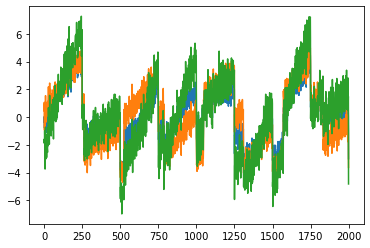

In [8]:
plt.plot(df[0])
plt.plot(df[1])
plt.plot(df[2])

In [44]:
class ICA:
    def __init__(self,dim):
        self.w = np.random.randn(dim,dim)
    
    def normalise(self,X):
        for i in X:
            X[i] = (X[i]-X[i].mean())/X[i].std()
        return np.array(X)
    
    def sigmoid(self,x):
        return 1/np.exp(-x)
    
    def fit(self,x,batch_size=100,iteration=100,alpha = 0.01):
        w = self.w
        self.sample,self.feature = x.shape
        for i in range(iteration):
            idx = np.random.randint(0,self.sample-1,batch_size)
            x_s = x[idx]
            for j in x_s:
                db = 1 - (2 * self.sigmoid(np.dot(self.w,j.T)))
                w = w + alpha*(np.dot(db,j) + np.linalg.inv(w).T)
        self.w = w
        
    def recon_source(self,x):
        x = np.array(x)
        source = np.dot(self.w,x.T).T
        return source

In [45]:
model = ICA(3)
x_n = model.normalise(df)

In [46]:
model.fit(x_n,100,100,1)

In [47]:
df.head()

,0,1,2
0,-0.547681,-0.474874,-0.784894
1,-0.094270,0.399053,-0.699187
2,-0.352713,0.104470,-0.820250
3,-0.097471,0.355937,-0.484580
4,-0.220594,0.235765,-0.663195


In [48]:
model.w

array([[-453809.93357587, -453658.29672034, -453792.5136501 ],
       [-453789.4644244 , -453804.43166488, -453657.39645323],
       [-453655.69544549, -453785.47649964, -453805.09320857]])

In [49]:
s = model.recon_source(df)

In [50]:
s = pd.DataFrame(s)
# s = model.normalise(s)
s

,0,1,2
0,8.201528e+05,8.201049e+05,8.201386e+05
1,1.790326e+05,1.788779e+05,1.789761e+05
2,4.848940e+05,4.847607e+05,4.848366e+05
3,1.026582e+05,1.025387e+05,1.026040e+05
4,2.941038e+05,2.939752e+05,2.940481e+05
...,...,...,...
1995,-2.510545e+05,-2.509364e+05,-2.510196e+05
1996,-6.352701e+05,-6.351308e+05,-6.352107e+05
1997,-1.088114e+05,-1.087260e+05,-1.087883e+05
1998,8.120910e+04,8.134213e+04,8.124963e+04


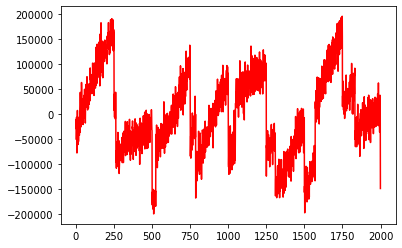

In [42]:
plt.plot(s[0],c="r")

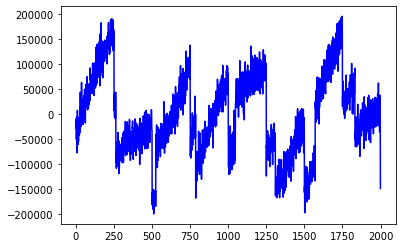

In [43]:
plt.plot(s[1],c="b")

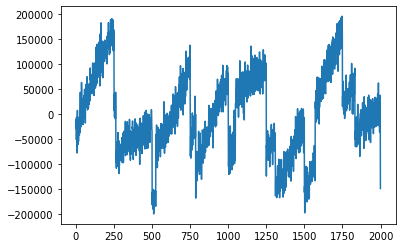

In [39]:
plt.plot(s[2])